# Different question types

In [1]:
%cd ..

/home/jupyter-stefan.beuchert/2022-11-26_version


In [2]:
# config
number_of_features = 10 # the default value
number_of_samples = 5000 # the default value

source_path_for_data = f'data/Data_Preparation/lime_ns_{number_of_samples}_nf_{number_of_features}_after_frequency_analysis.json'

In [3]:
from src.analyzer import sort_tokens_in_categories, get_frequencie, display_frequencies
from src.ExplanationObjectForQuestionType import ExplanationObjectForQuestionType

import pandas as pd
import matplotlib.pyplot as plt

/home/jupyter-stefan.beuchert/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/jupyter-stefan.beuchert/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:529: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [4]:
# load data
data_df = pd.read_json(source_path_for_data)
data_df['explanation'] = [pd.DataFrame(exp) for exp in data_df['explanation'].tolist()]
data_df.head()

,question,answers,context,document_id,is_impossible,usage,prediction,explanation
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...
36553,Wer wanderte nach North Carolina Anfang des 20...,"[{'answer_id': 36895, 'document_id': 40789, 'q...",North_Carolina\n\n==== Europäische Amerikaner ...,40789,False,test,eine Gruppe orthodoxer Einwanderer aus der Ukr...,position_id lime_token question_or_contex...
36597,Was gehört zum Stadtkirchenverband Hannover?,"[{'answer_id': 36938, 'document_id': 40797, 'q...",Hannover\n\n==== Evangelisch-lutherische Kirch...,40797,False,test,Alle landeskirchlichen evangelischen Kirchenge...,position_id lime_token question...
37392,Wann starb Athanasius der Große?,"[{'answer_id': 37749, 'document_id': 41075, 'q...","Athanasius_der_Große\nGriechische Ikone, Titul...",41075,False,test,2. Mai 373,position_id lime_token question_or_con...
37351,Welche Länder liegen östlich des Irans?,"[{'answer_id': 37706, 'document_id': 41082, 'q...",Iran\n\n=== Antike und Mittelalter ===\nDas he...,41082,False,test,Indien und China,position_id lime_token question_or_conte...


## Prepare Data

In [5]:
# split into question types
def identify_question_type(question):
    question = question.lower()
    if question[-1] == '?': question = question[:-1] # remove '?' from question (if there is one)
    
    question_type = None
    
    # check for 'wie viel' as the only w-question that contains two 2 tokens
    if 'wie viel' in question:
        question_type = 'wie viel'
    
    # if 'wie viel' is identified, no need to check for other question words
    else:
        # split question into tokens
        question_tokens = question.split(' ')
        
        # turns out that all questions have the question word at the beginning of the question.
        # therefore we only have to look at the first token
        # question_tokens = [question_tokens[0]]

        question_words_list = [
            # https://de.wikipedia.org/wiki/W-Wort
            'wer', 'welche', 'welcher',
            'wem', 'wen', 'welchen', 'welchem',
            'wessen',
            'was', 'welches',
            'warum', 'weshalb', 'weswegen', 'wieso',
            'wie', 'wieweit', #'wie viel'
            'wofür', 'wozu', 'womit', 'wodurch', 'worum', 'worüber', 'wobei', 'wovon', 'woraus',
            'wo', 'wogegen',
            'wohin', 'woher',
            'woran', 'worin', 'worauf', 'worunter', 'wovor', 'wohinter', 'woneben',
            'wann',
            # below words that have been added by looking at the questions that are not covered by the word above
            'wonach', 'inwiefern' 
        ]

        # check for other w-quetions
        for question_word in question_words_list:
            if question_word in question_tokens:
                if (question_type is not None):
                    #print(f'{question} - has multiple question types')
                    question_type = 'conflict'
                else:
                    question_type = question_word
    
    if question_type is None:
        print(f'{question} - has no question type')
        question_type = 'undefined'
        
    if question_type is None:
        print(i)
    return question_type

In [6]:
question_list = data_df['question'].tolist()
question_type_list = [identify_question_type(q) for q in question_list]
data_df['question_type'] = question_type_list

gibt es immer noch kohlenfadenlampen - has no question type
zum wievielten mal hintereinander stand der fc everton 1986 im fa cup finale - has no question type
ist usb mit atari mint benutzbar - has no question type
war die glorious revolution gewaltsam - has no question type
in wiefern erweiterte rudolf clausius das verständnis von energie und wärme - has no question type
haben wir im moment eine warm- oder kaltzeit - has no question type
war die republik der vereinigten niederlande ein zentralstaat - has no question type
ist frankreich offensiv, oder defensiv an den deutsch-französischen-krieg herangegangen - has no question type
sind usb 3.0.stecker mit älteren typen kompatibel - has no question type
müssen hunde gegen tollwut geimpft werden - has no question type
ist in englischen pubs das rauchen erlaubt - has no question type
ist kupfer gesundheitsschädlich - has no question type
liegt bildung im aufgabenbereich der verwaltungsbezirke von melbourne oder beim bundesstaat - has no 

In [7]:
data_df.head()

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...,wie viel
36553,Wer wanderte nach North Carolina Anfang des 20...,"[{'answer_id': 36895, 'document_id': 40789, 'q...",North_Carolina\n\n==== Europäische Amerikaner ...,40789,False,test,eine Gruppe orthodoxer Einwanderer aus der Ukr...,position_id lime_token question_or_contex...,wer
36597,Was gehört zum Stadtkirchenverband Hannover?,"[{'answer_id': 36938, 'document_id': 40797, 'q...",Hannover\n\n==== Evangelisch-lutherische Kirch...,40797,False,test,Alle landeskirchlichen evangelischen Kirchenge...,position_id lime_token question...,was
37392,Wann starb Athanasius der Große?,"[{'answer_id': 37749, 'document_id': 41075, 'q...","Athanasius_der_Große\nGriechische Ikone, Titul...",41075,False,test,2. Mai 373,position_id lime_token question_or_con...,wann
37351,Welche Länder liegen östlich des Irans?,"[{'answer_id': 37706, 'document_id': 41082, 'q...",Iran\n\n=== Antike und Mittelalter ===\nDas he...,41082,False,test,Indien und China,position_id lime_token question_or_conte...,welche


## Visualize W-Word distribution

   question_type  count
5            was    441
17           wie    249
3           wann    247
6         welche    243
13           wer    188
18      wie viel    154
9        welcher    106
20            wo    102
7        welchem     75
4          warum     73
10       welches     62
8        welchen     57
19         wieso     31
2      undefined     25
22         wofür     19
11           wem     18
0       conflict     16
33          wozu     10
23         woher      9
21       wodurch      8
12           wen      7
24         wohin      6
32         wovon      5
27         woran      4
1      inwiefern      4
15        wessen      4
16      weswegen      2
26        wonach      2
14       weshalb      2
28        woraus      2
30         worum      2
29         worin      1
31       worüber      1
25         womit      1


<AxesSubplot: xlabel='question_type'>

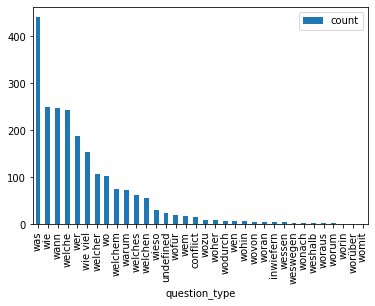

In [8]:
df_for_bar_chart = data_df.groupby(['question_type'])['question_type'].count().reset_index(name='count').sort_values(['count'], ascending=False)
print(df_for_bar_chart)
df_for_bar_chart.plot(kind = 'bar', x = 'question_type')

### Deep dive 'was'

In [9]:
was_questions = data_df[data_df['question_type'] == 'wo']
was_questions.head(3)

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
38607,Wo in der Schweiz wird Fronleichnam gefeiert?,"[{'answer_id': 39010, 'document_id': 40720, 'q...",Schweiz\n\n=== Feiertage ===\nIn der Schweiz i...,40720,False,test,nur in den katholischen Kantonen,position_id lime_token question_or_conte...,wo
37367,Wo kann man Rettungshundeprüfungen machen?,"[{'answer_id': 37722, 'document_id': 40682, 'q...",Haushund\n\n==== Sonstiges ====\nEine Verpflic...,40682,False,test,nur in einer zugelassenen Rettungshundestaffel,position_id lime_token quest...,wo
41483,Wo in Hannover stehen die Skulpturen von Niki ...,"[{'answer_id': 43108, 'document_id': 40764, 'q...","Hannover\n\n=== Denkmale, Mahnmale und Straßen...",40764,False,test,am Leibnizufer,position_id lime_token question_or_con...,wo


out of 102 data points, 8 have been deleted, because GELECTRA could not finde a sufficent answer. 94 data point remaining


/home/jupyter-stefan.beuchert/2022-11-26_version/src/ExplanationObjectForQuestionType.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_context_df['prediction_length'] = answer_context_df.apply(
/home/jupyter-stefan.beuchert/2022-11-26_version/src/ExplanationObjectForQuestionType.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_context_df['context_length'] = answer_context_df.apply(lambda row: len(row['context'].split()), axis = 1)


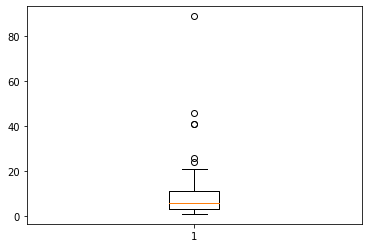

In [10]:
was_explanation = ExplanationObjectForQuestionType('was', was_questions)

In [12]:
#was_explanation.visualize()

In [13]:
was_question_tokens_with_weights_dict = sort_tokens_in_categories(was_questions['explanation'].tolist())

In [14]:
# number of data points
number_of_datapoints = len(was_questions)
percentile_1 = int(number_of_datapoints * 0.01)
percentile_5 = int(number_of_datapoints * 0.05)
percentile_10 = int(number_of_datapoints * 0.1)

In [15]:
# Exploring the properties of LIME explanations in context of the "what" questions

# answer lengths

#### answer length

102
94
[1, 21]


/tmp/ipykernel_628407/4239716078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_context_df['prediction_length'] = answer_context_df.apply(lambda row: len(row['prediction'].split()), axis = 1)
/tmp/ipykernel_628407/4239716078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer_context_df['context_length'] = answer_context_df.apply(lambda row: len(row['context'].split()), axis = 1)


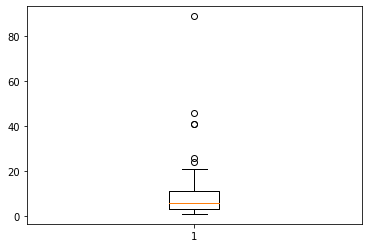

In [16]:
answer_context_df = was_questions[['prediction', 'context']]
answer_context_df['prediction_length'] = answer_context_df.apply(lambda row: len(row['prediction'].split()), axis = 1)
answer_context_df['context_length'] = answer_context_df.apply(lambda row: len(row['context'].split()), axis = 1)

print(len(answer_context_df))

relevant_answer_lengths_df = answer_context_df[(answer_context_df['prediction_length'] > 0) 
                                            & (answer_context_df['prediction_length'] < answer_context_df['context_length'])]

print(len(relevant_answer_lengths_df))

# relevant_answer_lengths.groupby(['prediction_length']).size().plot(kind = "bar", xlabel = 'token length', ylabel = 'occurences')
box_plot_answer_lengths = plt.boxplot(relevant_answer_lengths_df['prediction_length'].tolist())
print([int(item.get_ydata()[1]) for item in box_plot_answer_lengths['whiskers']])

#token_count_answer_list = [len(answer.split()) for answer in answer_list]

In [17]:
def get_relevant_data(self, data):
    answer_context_df = data[['prediction', 'context']]
    answer_context_df['prediction_length'] = answer_context_df.apply(lambda row: len(row['prediction'].split()), axis = 1)
    answer_context_df['context_length'] = answer_context_df.apply(lambda row: len(row['context'].split()), axis = 1)
    
    

    relevant_answer_lengths_df = answer_context_df[(answer_context_df['prediction_length'] > 0) 
                                                   & (answer_context_df['prediction_length'] < answer_context_df['context_length'])]
    
    print(f'out of {len(answer_context_df)} data points, {len(answer_context_df) - len(relevant_answer_lengths_df)} have been deleted,\n because GELECTRA could not finde a sufficent answer. \n {len(relevant_answer_lengths_df)} data point remaining')
    
    return relevant_answer_lengths_df

In [18]:
was_questions

,question,answers,context,document_id,is_impossible,usage,prediction,explanation,question_type
38607,Wo in der Schweiz wird Fronleichnam gefeiert?,"[{'answer_id': 39010, 'document_id': 40720, 'q...",Schweiz\n\n=== Feiertage ===\nIn der Schweiz i...,40720,False,test,nur in den katholischen Kantonen,position_id lime_token question_or_conte...,wo
37367,Wo kann man Rettungshundeprüfungen machen?,"[{'answer_id': 37722, 'document_id': 40682, 'q...",Haushund\n\n==== Sonstiges ====\nEine Verpflic...,40682,False,test,nur in einer zugelassenen Rettungshundestaffel,position_id lime_token quest...,wo
41483,Wo in Hannover stehen die Skulpturen von Niki ...,"[{'answer_id': 43108, 'document_id': 40764, 'q...","Hannover\n\n=== Denkmale, Mahnmale und Straßen...",40764,False,test,am Leibnizufer,position_id lime_token question_or_con...,wo
37225,Wo wurde der Prototyp von HDTV mit vierfacher ...,"[{'answer_id': 37576, 'document_id': 40677, 'q...",High_Definition_Television\n\n== Weiterentwick...,40677,False,test,Auf der CeBIT 2006,position_id lime_token question_or_...,wo
37508,Wo befindet sich das Grab von Diego Rivera?,"[{'answer_id': 37867, 'document_id': 41050, 'q...",Mexiko-Stadt\n\n==== Chapultepec-Park ====\nDe...,41050,False,test,,position_id lime_token question_or_cont...,wo
...,...,...,...,...,...,...,...,...,...
38606,Wo wird in der Schweiz das Knabenschiessen gef...,"[{'answer_id': 39009, 'document_id': 40720, 'q...",Schweiz\n\n=== Feiertage ===\nIn der Schweiz i...,40720,False,test,in Zürich,position_id lime_token question_or_conte...,wo
45657,Wo sind Perlhühner ursprünglich heimisch?,"[{'answer_id': 46729, 'document_id': 41016, 'q...",Geflügel\n\n=== Wildgeflügel ===\n* Junge ''Fa...,41016,False,test,aus Afrika,position_id lime_token question_or_con...,wo
37667,Wo leben Säugetiere?,"[{'answer_id': 38031, 'document_id': 40843, 'q...",Säugetiere\n\n== Verbreitung und Lebensräume =...,40843,False,test,"auf allen Kontinenten, in allen Ozeanen sowie ...",position_id lime_token question_or_c...,wo
36771,Wo ist der Sitz der Legislative Rajasthans?,"[{'answer_id': 37119, 'document_id': 41117, 'q...",Rajasthan\n\n=== Politisches System ===\nDie L...,41117,False,test,Jaipur,position_id lime_token question_or_contex...,wo


/tmp/ipykernel_628407/2106714602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  was_questions['prediction_length'] = [len(answer.split()) for answer in was_questions['prediction'].tolist()]


<AxesSubplot: xlabel='token length', ylabel='occurences'>

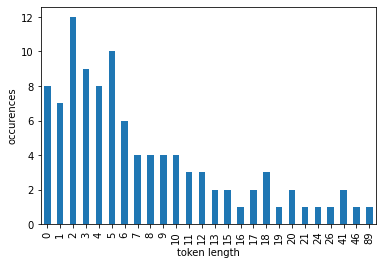

In [19]:
was_questions['prediction_length'] = [len(answer.split()) for answer in was_questions['prediction'].tolist()]
was_questions.groupby(['prediction_length']).size().plot(kind = "bar", xlabel = 'token length', ylabel = 'occurences')

In [20]:
a = was_questions['prediction_length'].describe()

In [21]:
q_low = was_questions["prediction_length"].quantile(0.01)
q_hi  = was_questions["prediction_length"].quantile(0.99)

df_filtered = was_questions[(was_questions["prediction_length"] < q_hi) & (was_questions["prediction_length"] > q_low)]

<AxesSubplot: xlabel='token length', ylabel='occurences'>

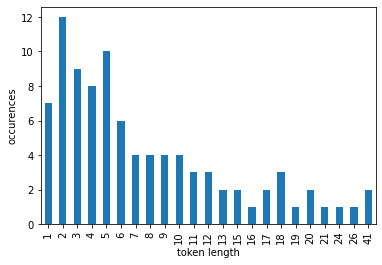

In [22]:
df_filtered.groupby(['prediction_length']).size().plot(kind = "bar", xlabel = 'token length', ylabel = 'occurences')

In [23]:
df_filtered.describe()

,document_id,prediction_length
count,92.000000,92.000000
mean,40887.010870,8.184783
std,142.405742,7.666008
min,40677.000000,1.000000
25%,40751.000000,3.000000
50%,40871.000000,5.500000
75%,41008.000000,11.000000
max,41158.000000,41.000000


<AxesSubplot: xlabel='word'>

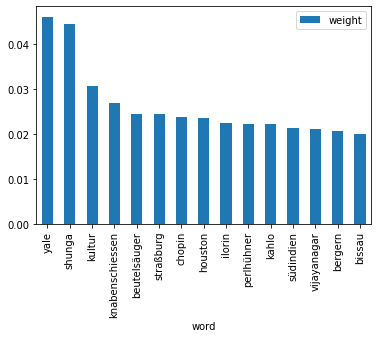

In [24]:
# start tokens with percentile, no stopwords and weigthed average
start_tokens_tfidf_df = get_frequencie(was_question_tokens_with_weights_dict['start_tokens_df'], 
                                       max_tokens = 15, mode = 'weight', target = 'word', 
                                       remove_stop_words = True, min_count = percentile_1)

start_tokens_tfidf_df.plot(x = 'word', y = 'weight', kind = 'bar')

In [ ]:
# start ner with percentile, no stopwords and weigthed average
start_ner_tfidf_df = get_frequencie(was_question_tokens_with_weights_dict['start_tokens_df'], 
                                       max_tokens = 15, mode = 'frq', target = 'ner_tag', 
                                       remove_stop_words = True, min_count = percentile_1)

start_ner_tfidf_df.plot(x = 'ner_tag', y = 'count', kind = 'bar')

In [ ]:
# start ner with percentile, no stopwords and weigthed average
start_ner_tfidf_df = get_frequencie(was_question_tokens_with_weights_dict['start_tokens_df'], 
                                       max_tokens = 15, mode = 'weight', target = 'ner_tag', 
                                       remove_stop_words = True, min_count = percentile_1)

start_ner_tfidf_df.plot(x = 'ner_tag', y = 'weight', kind = 'bar')